# Chat GPT News Headline Sentiment Analysis

# Problem Statement

Our goal is to analyze how the news media's sentiment regarding Artificial Intelligence Chatbot, ChatGPT, has evolved over a 5-month period from its release on Novermber 30th, 2022 to April 30th, 2023.


In this project, we will:
- Perform a sentiment analysis on news headlines about ChatGPT.
- Present visualizations that show trends/patterns derived from our sentiment analysis.
  - Analyze how the sentiment of these headlines have changed over time since its launch.
  - Analyze the breakdown of article sentiments (positive, neutral, negative) across each media outlet.


## What is Sentiment Analysis?

- Sentiment is an opinion of or attitude towards something which can be conveyed by words.

- Sentiment analysis analyzes text to determine if its emotional tone is positive, neutral, or negative.

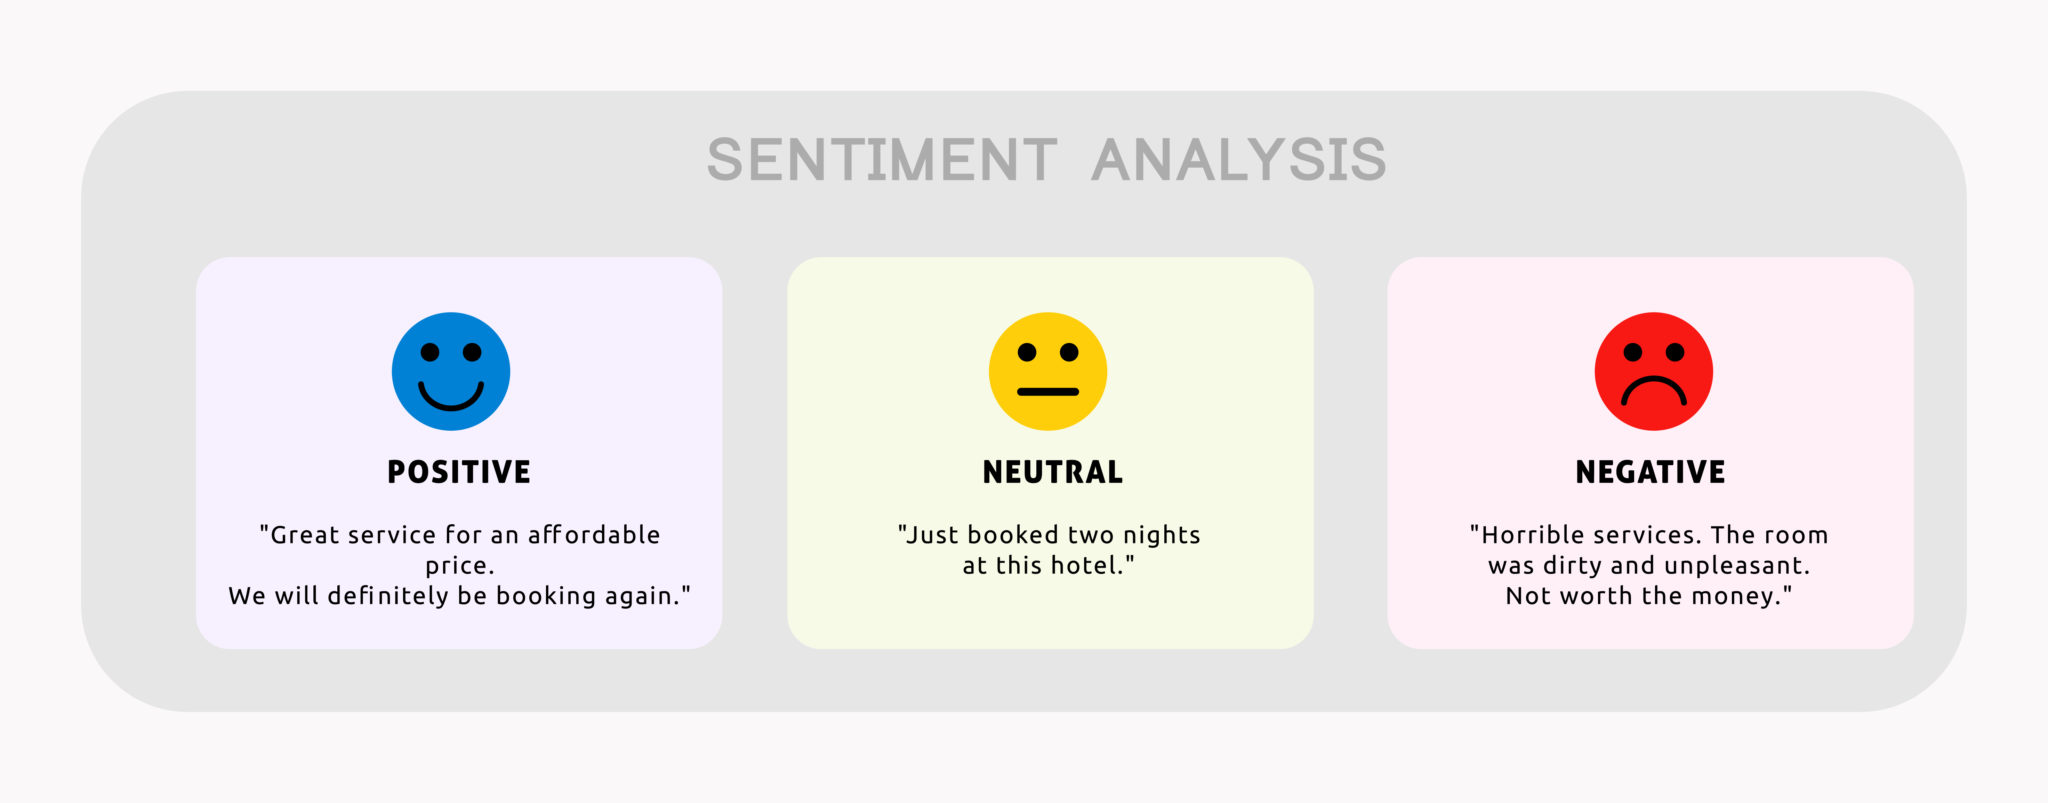

# Data Pipeline


## What is a Data Pipeline?

A method in which raw data is ingested from one or multiple data sources, processed, and then sent to a data storage system.

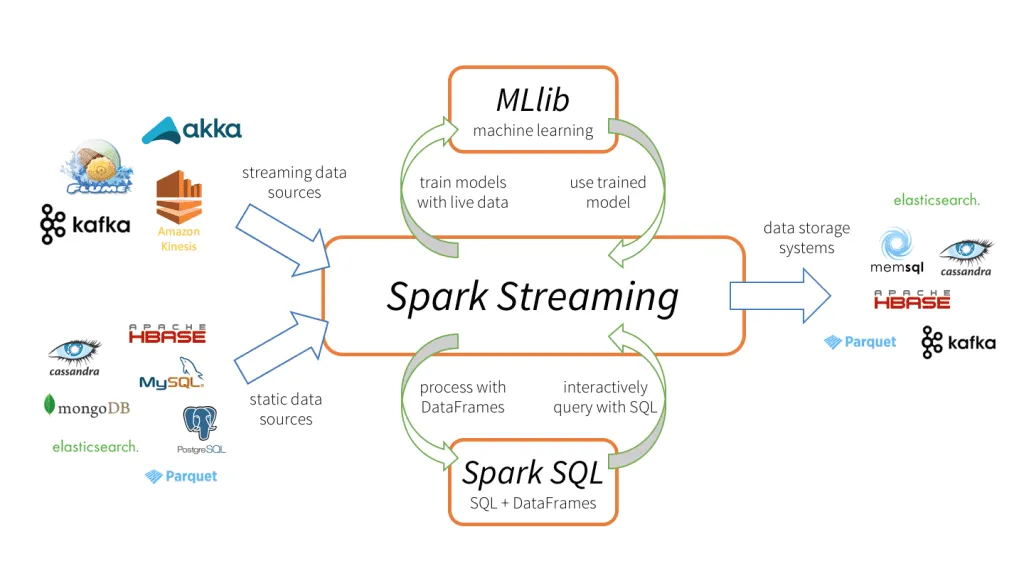




## Our Data Pipeline - Tools and Technology

- Fetch data (articles) using the GNews (Google News) Python API.
- Send articles to Kafka for data ingestion.
- Use Spark to read the data stream from Kafka and store it as a Spark Structured Streaming dataframe.
- Perform sentiment analysis on Spark Structured Streaming dataframe using:
  - TextBlob and NLTK Library
- Store data (articles with assigned sentiment) in output storage sinks.
  - MongoDB, Kafka, Parquet Files.
- Create visualizations of data using MongoDB Atlas.
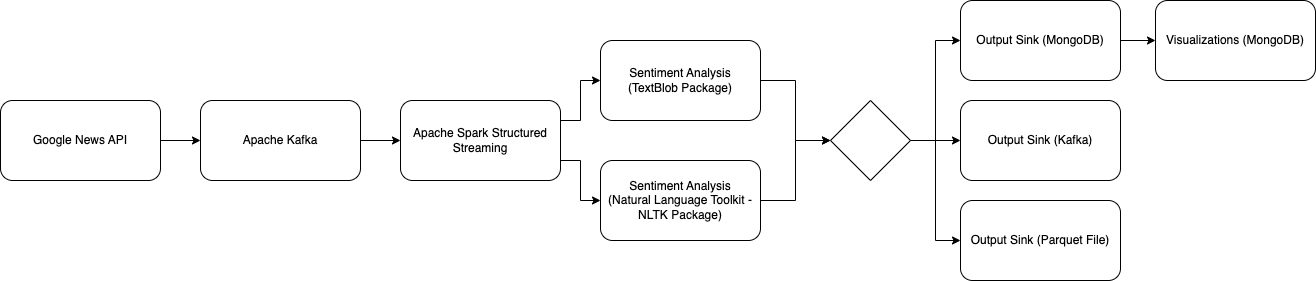

## Why is this a Big Data project?

“What typically defines big data is the need for new techniques and tools in order to be able to process it. In order to use big data, you need programs which span multiple physical and/or virtual machines working together in concert in order to process all of the data in a reasonable span of time.” - Professor Rodriguez, Lecture 1

Big Data architectures have a number of layers or components. These are some of the most common that are in our project:
- Data sources (GNews API)
- Data storage / Analytical Data Store (MongoDB)
- Real-time message ingestion (Kafka)
- Stream processing (Spark)

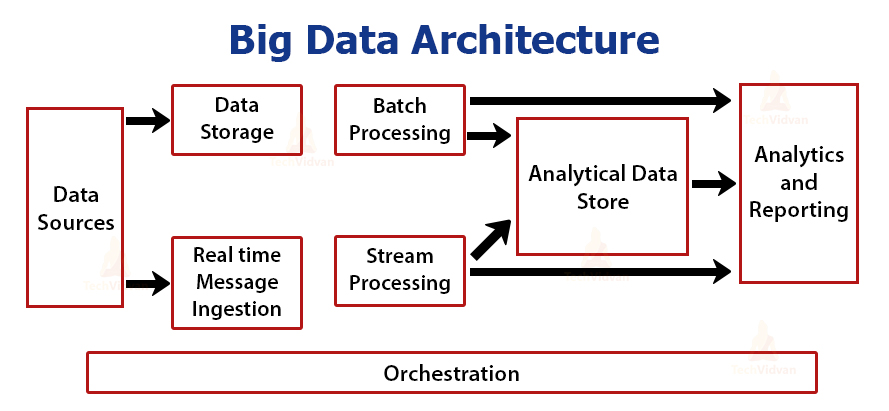


## GNews (Google News) Python API

- In order to create an application generating events for Kafka, we used the GNews Python API.

- It fetches articles that contain the user-defined keyword (in our case “GPT”) from Google News

- GNews retrieves a maximum of 100 articles per request.

- Sample JSON Response:

    {'description': 'The Amazing Ways Duolingo Is Using AI And GPT-4  Forbes',
    'published date': 'Fri, 28 Apr 2023 06:31:28 GMT',
    'publisher': {'href': 'https://www.forbes.com', 'title': 'Forbes'},
    'title': 'The Amazing Ways Duolingo Is Using AI And GPT-4 - Forbes',
    'url': 'https://news.google.com/rss/articles/...'}

- GNews allows users to specify the dates between which they want to retrieve articles.

- We retrieved ChatGPT related articles for each day of the 5-month period (November 30th, 2023 to April 30th, 2023).

- After each query, the daily batch of articles was sent to Kafka


## Apache Kafka

- Apache Kafka is a distributed publish-subscribe messaging system.
- Broker: one of many servers running in a Kafka cluster.
- Topic: category to which records are stored and published.
  - Divided into partitions that are split across brokers, allowing parallelization.
- Producer: sends each streaming event (batch of articles) to the topic.
  - Establishes the connection with brokers.
- Consumer: retrieves each batch of articles to the topic.

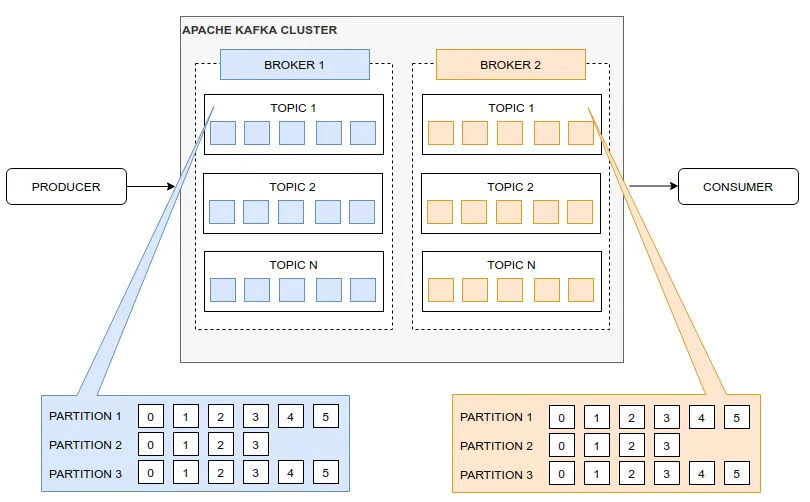


## Apache Spark Structured Streaming

- A scalable, fault-tolerant, low latency engine that processes streams of data.
- Spark reads the latest available data from the streaming data source (Kafka).
- Processes it incrementally, updates result, and then discards the source data.
- Every data item (batch of articles) arriving in the stream acts like a new row being appended to the dataframe.
- Queries are processed using a micro-batch processing engine, which processes data streams as a series of small batch jobs.

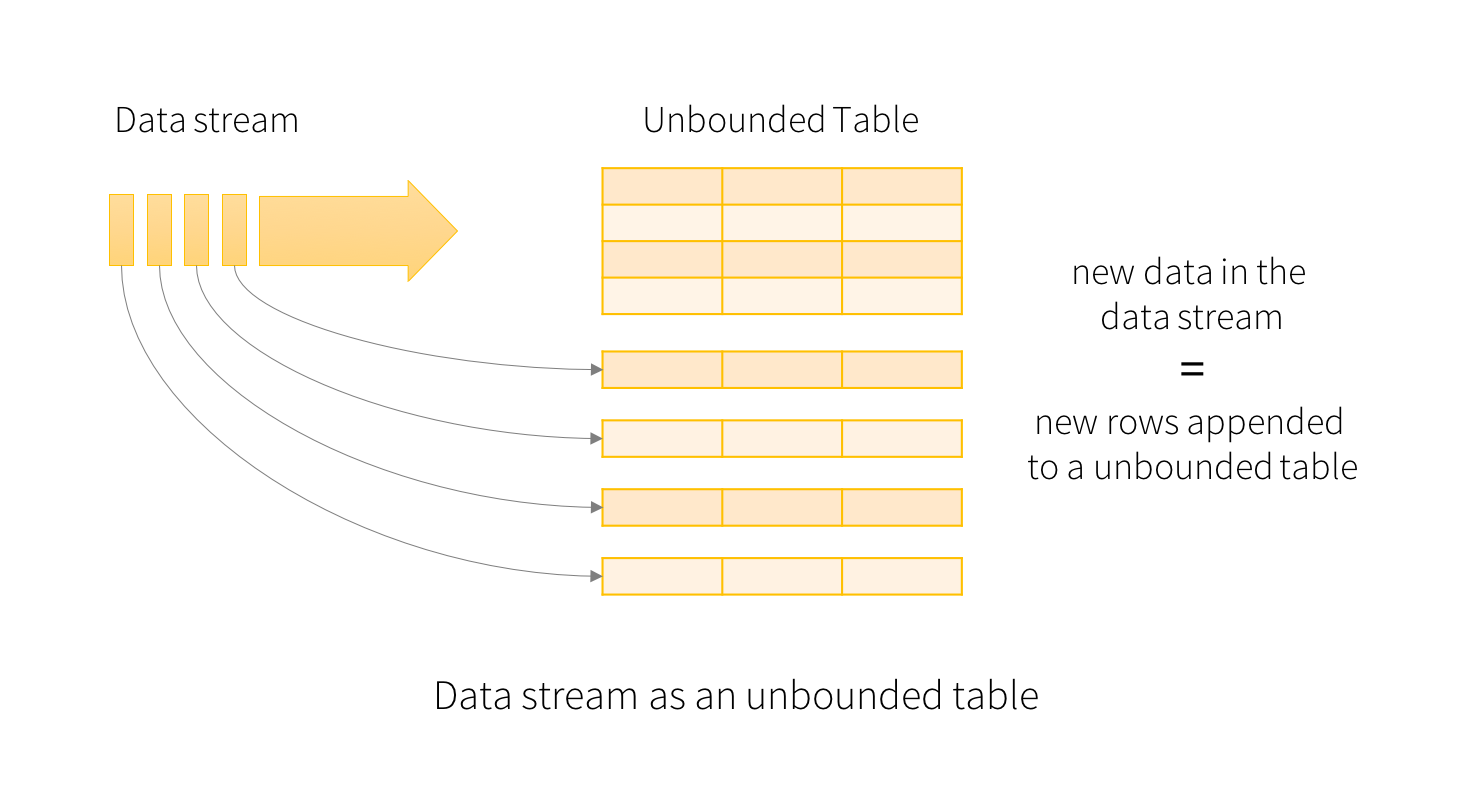


## Apache Spark Data Processing

- Read data stream (binary) from Kafka into a Spark Structured Streaming dataframe (string).
- Unpack dataframe and remove Kafka attributes to prepare for sentiment analysis.

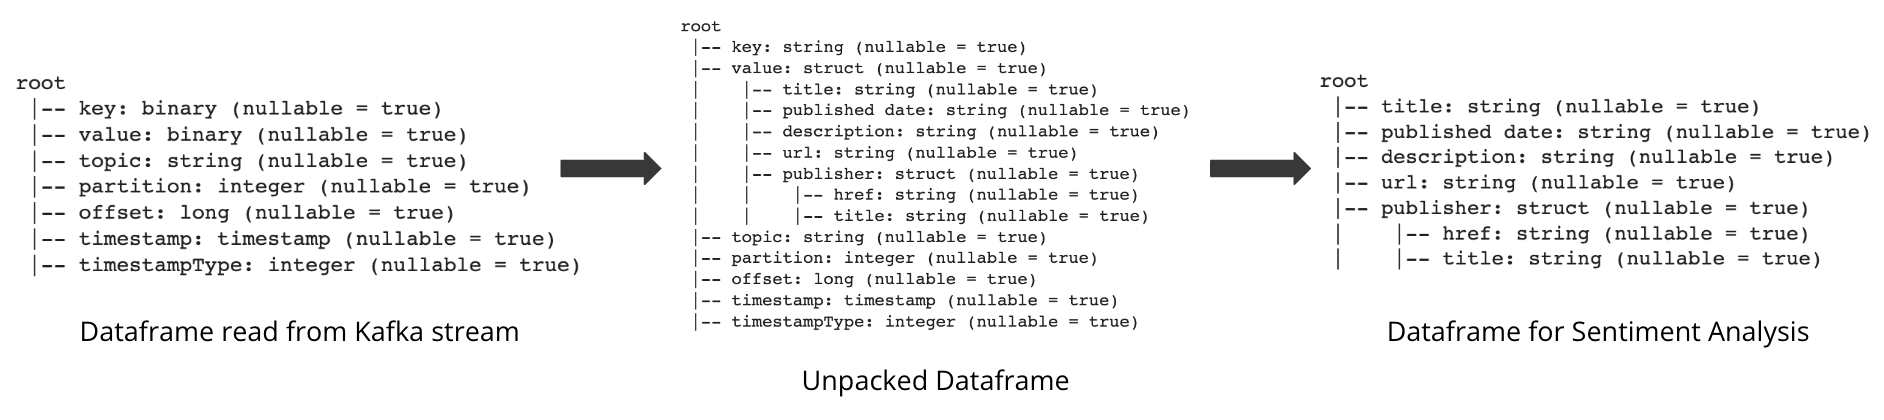

## Sentiment Analysis - TextBlob and NLTK

- The two most common approaches for performing sentiment analysis include using the TextBlob and NLTK Libraries.
- The TextBlob library has a property, sentiment, that returns a namedtuple of the form sentiment (polarity, subjectivity).
- The NLTK SentimentIntensityAnalyzer calculates the polarity of the data.
- The polarity score for both libraries is a float within the range [-1.0, 1.0].
  - If the polarity is <0 the article sentiment is classified as “Negative”.
  - If the polarity is ==0 the article sentiment is classified as “Neutral”.
  - If the polarity is >0 the article sentiment is classified as “Positive”.
- The output of these sentiments are then sent to the output storage sink.

- Sentiment Analysis Sample: “Positive”

  {_id: ObjectId('645cc3236a641949cfdbe749')
  title: "ChatGPT-4: The Revolutionary AI That's 500x More Advanced Than ... - N…"
  published date: "Sun, 08 Jan 2023 08:00:00 GMT"
  description: "ChatGPT-4: The Revolutionary AI That's 500x More Advanced Than ...  Ne…"
  url: "https://news.google.com/rss/articles/CBMikAFodHRwczovL29yaWdpbmFsLm5ld…"
  publisher: {href: "https://original.newsbreak.com", title: "NewsBreak Original"
  processed_title: "chatgpt   the revolutionary ai that s x more advanced than     newsbre…"
  subjectivity: 0.6166666746139526
  polarity: 0.42500001192092896
  sentiment: "Positive"}

- Sentiment Analysis Sample: “Neutral”

  {_id: ObjectId('645cc3236a641949cfdbe585')
  title: "Meet GPT-JT, the Closest Open Source Alternative to GPT-3 - Analytics …"
  published date: "Wed, 30 Nov 2022 08:00:00 GMT"
  description: "Meet GPT-JT, the Closest Open Source Alternative to GPT-3  Analytics I…"
  url: "https://news.google.com/rss/articles/CBMiV2h0dHBzOi8vYW5hbHl0aWNzaW5ka…"
  publisher: {href: "https://analyticsindiamag.com", title: "Analytics India Magazine"}
  processed_title: "meet gpt jt  the closest open source alternative to gpt    analytics i…"
  subjectivity: 0.5
  polarity: 0
  sentiment: "Neutral"}

- Sentiment Analysis Sample: “Negative”

  _id: ObjectId('645cc3266a641949cfdbe78a')
  title: "Educators concerned about students using artificial intelligence bots …"
  published date: "Wed, 11 Jan 2023 08:00:00 GMT"
  description: "Educators concerned about students using artificial intelligence bots …"
  url: "https://news.google.com/rss/articles/CBMiiAFodHRwczovL3d3dy5raXJvNy5jb…"
  publisher: {href: "https://www.kiro7.com", title: "KIRO Seattle"}
  processed_title: "educators concerned about students using artificial intelligence bots …"
  subjectivity: 1
  polarity: -0.6000000238418579
  sentiment: "Negative"






## Output Storage Sinks - MongoDB Atlas, Kafka, and Parquet

- We stored our output in 3 different storage sinks
MongoDB Atlas (Primary Output Sink).
  - A document-oriented NoSQL database used for high volume data storage.
- Kafka
- Parquet Files
  - A column-oriented data file format that uses a data compression and encoding scheme for efficient data storage and retrieval.
  - Not human readable.

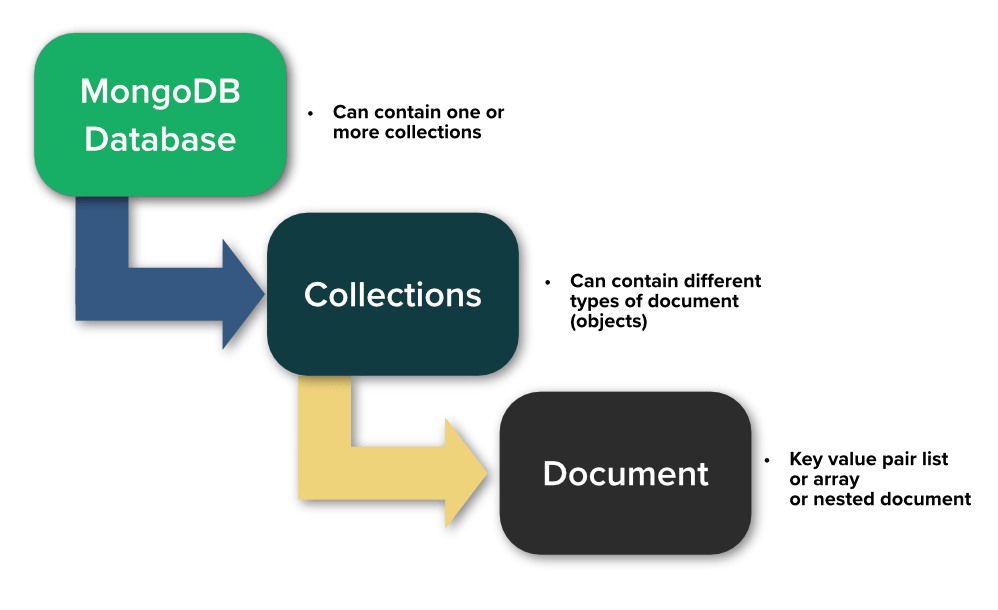

# Installations

## Install GNews

In [ ]:
!pip install git+https://github.com/ranahaani/GNews.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ranahaani/GNews.git to /tmp/pip-req-build-5d4n2fkk
  Running command git clone --filter=blob:none --quiet https://github.com/ranahaani/GNews.git /tmp/pip-req-build-5d4n2fkk
  Resolved https://github.com/ranahaani/GNews.git to commit 8591313e3fdaaf44e2e09f2265254fc3aaea8b56
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.8/115.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.1/517.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.4/188.4 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gnews: filename=gnews-0.2.7-py3-none-any.whl size=16

## Install Pyspark

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=05de4c31c13f82d4fbc02dcdb4cd52843de44b863b8addbd2296da92c8a79fb3
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


## Install PyMongo

In [ ]:
!pip install pymongo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Install Kafka

Installation and configuration of Kafka completed using: https://colab.research.google.com/github/recohut/notebook/blob/master/_notebooks/2021-06-25-kafka-spark-streaming-colab.ipynb#scrollTo=YUj0878jPyz7

In [ ]:
!pip install kafka-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 15.5 MB/s eta 0:00:00


Download and configure local Kafka and Zookeeper instances. Kafka (Brokers: 127.0.0.1:9092). Zookeeper (Node: 127.0.0.1:2181).

In [ ]:
!curl -sSOL https://downloads.apache.org/kafka/3.4.0/kafka_2.13-3.4.0.tgz
!tar -xzf kafka_2.13-3.4.0.tgz

In [ ]:
!./kafka_2.13-3.4.0/bin/zookeeper-server-start.sh -daemon ./kafka_2.13-3.4.0/config/zookeeper.properties
!./kafka_2.13-3.4.0/bin/kafka-server-start.sh -daemon ./kafka_2.13-3.4.0/config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


Create the Kafka topic, "google-news", with 10 partitions (partitions=10) and a replication factor of 1 (replication-factor=1). The replication factor 1 for the google-news topic is 1, which indicates that the data is not being replicated. The dated is not being replicated because thsi is not a development system, not a production system. This means that there is only one broker (server) in our kafka setup. However, in production systems, there are multiple brokers which allow replicationof data in the google-news topic and and fault tolerance.

In [ ]:
!./kafka_2.13-3.4.0/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 10 --topic google-news

Created topic google-news.


Describe the Kafka topic, "google-news", to display configuration details

In [ ]:
!./kafka_2.13-3.4.0/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic google-news

Topic: google-news	TopicId: 1p_IlIGJRRWppMk2zPsq2Q	PartitionCount: 10	ReplicationFactor: 1	Configs: 
	Topic: google-news	Partition: 0	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news	Partition: 1	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news	Partition: 2	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news	Partition: 3	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news	Partition: 4	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news	Partition: 5	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news	Partition: 6	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news	Partition: 7	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news	Partition: 8	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news	Partition: 9	Leader: 0	Replicas: 0	Isr: 0


# Pipeline Stage 2: Apache Kafka (Producer)

Apache Kafka pipeline stage completed using: https://colab.research.google.com/github/recohut/notebook/blob/master/_notebooks/2021-06-25-kafka-spark-streaming-colab.ipynb#scrollTo=YUj0878jPyz7

Define a fucntion which creates a Kafka producer that sends each daily batch of articles (streaming event) as a message to Kafka topic "google-news".

In [ ]:
import json
from kafka import KafkaProducer
from kafka.errors import KafkaError

def error_callback(exc):
    raise Exception('Error while sending data to kafka: {0}'.format(str(exc)))

def write_to_kafka(topic_name, items):
  count=0
  producer = KafkaProducer(bootstrap_servers=['127.0.0.1:9092'], value_serializer=lambda x: json.dumps(x).encode('utf-8'))
  for message in items:
    producer.send(topic_name, message).add_errback(error_callback)
    count+=1
  producer.flush()
  print("Wrote {0} messages(articles) into topic: {1}".format(count, topic_name))

# Pipeline Stage 1: GNews

- To simulate an application generating events for Kafka, we used the GNews Python API which fetches articles that contain the user defined keyword ("GPT") from Google News and sends them to the "google-news" Kafka topic.

- Articles that are fecthed will include words such as "ChatGPT," "GPT-4," "Chat-GPT 5," and more. The API was queried to fetch a maximum of 100 articles published each day since ChatGPT's launch on November, 30th 2022 up until April 30th.

- Each daily batch of articles is sent as a message to the Kafka topic "google-news".

- The message is sent to the Kafka topic in binary format.

In [ ]:
import datetime
from pprint import pprint
from gnews import GNews

def generate_articles(search_term):
  # Dates between which the GNews API fetches articles from
  start = datetime.date(2022, 11, 30)
  end = start + datetime.timedelta(days = 1)

  # Final date to fetch articles from GNews API
  stop = datetime.date(2023, 4, 30)

  while end <= stop:
      print("Requesting ChatGPT News Headlines from start:", start, "to end:", end, "\n")

      # Fetch data from GNews API
      google_news = GNews(start_date=start, end_date=end)
      daily_news = google_news.get_news(search_term)

      # Send daily_news, composed of articles, to kafka topic google-news
      # sample article:
      # {'description': 'The Amazing Ways Duolingo Is Using AI And GPT-4  Forbes',
      #  'published date': 'Fri, 28 Apr 2023 06:31:28 GMT',
      #  'publisher': {'href': 'https://www.forbes.com', 'title': 'Forbes'},
      #  'title': 'The Amazing Ways Duolingo Is Using AI And GPT-4 - Forbes',
      #  'url': 'https://news.google.com/rss/articles/...'}

      write_to_kafka("google-news", daily_news)

      # Increment start and end date
      start = start + datetime.timedelta(days = 1)
      end = start + datetime.timedelta(days = 1)

In [ ]:
generate_articles("GPT")

Requesting ChatGPT News Headlines from start: 2022-11-30 to end: 2022-12-01 

Wrote 28 messages(articles) into topic: google-news
Requesting ChatGPT News Headlines from start: 2022-12-01 to end: 2022-12-02 

Wrote 31 messages(articles) into topic: google-news
Requesting ChatGPT News Headlines from start: 2022-12-02 to end: 2022-12-03 

Wrote 23 messages(articles) into topic: google-news
Requesting ChatGPT News Headlines from start: 2022-12-03 to end: 2022-12-04 

Wrote 10 messages(articles) into topic: google-news
Requesting ChatGPT News Headlines from start: 2022-12-04 to end: 2022-12-05 

Wrote 11 messages(articles) into topic: google-news
Requesting ChatGPT News Headlines from start: 2022-12-05 to end: 2022-12-06 

Wrote 31 messages(articles) into topic: google-news
Requesting ChatGPT News Headlines from start: 2022-12-06 to end: 2022-12-07 

Wrote 10 messages(articles) into topic: google-news
Requesting ChatGPT News Headlines from start: 2022-12-07 to end: 2022-12-08 

Wrote 14 mes

# Pipeline Stage 2: Apache Kafka (Consumer)

Apache Kafka pipeline stage completed using: https://medium.com/@lorenagongang/sentiment-analysis-on-streaming-twitter-data-using-kafka-spark-structured-streaming-python-part-b27aecca697a




A Kafka consumer is created for testing purposes to ensure that the GNews streaming data has been sent to the Kafka topic "google-news" correctly. The Kafka consumer retrieves one message (batch of articles) from the Kafka topic "google-news".

In [ ]:
from kafka import KafkaConsumer

def retrieve_from_kafka(topic):
  consumer = KafkaConsumer(topic,
      bootstrap_servers=['localhost:9092'],
      auto_offset_reset='earliest',
      enable_auto_commit=True,
      auto_commit_interval_ms=5000,
      consumer_timeout_ms=1000,
      fetch_max_bytes=128,
      max_poll_records=100,
      value_deserializer=lambda x: json.loads(x.decode('utf-8')))

  for message in consumer:
      articles = json.loads(json.dumps(message.value))
      print(articles)

In [ ]:
retrieve_from_kafka("google-news")

Streaming output truncated to the last 5000 lines.
{'title': "Law Firms Aren't Feeling AI Fatigue, Yet - Law360", 'description': "Law Firms Aren't Feeling AI Fatigue, Yet  Law360", 'published date': 'Fri, 21 Apr 2023 07:00:00 GMT', 'url': 'https://news.google.com/rss/articles/CBMiVWh0dHBzOi8vd3d3LmxhdzM2MC5jb20vcHVsc2UvYXJ0aWNsZXMvMTU5OTQzMi9sYXctZmlybXMtYXJlbi10LWZlZWxpbmctYWktZmF0aWd1ZS15ZXTSATFodHRwczovL3d3dy5sYXczNjAuY29tL3B1bHNlL2FtcC9hcnRpY2xlcy8xNTk5NDMy?oc=5&hl=en-US&gl=US&ceid=US:en', 'publisher': {'href': 'https://www.law360.com', 'title': 'Law360'}}
{'title': 'Spinify Unveils “Sidekick” - Martechcube', 'description': 'Spinify Unveils “Sidekick”  Martechcube', 'published date': 'Fri, 21 Apr 2023 07:00:00 GMT', 'url': 'https://news.google.com/rss/articles/CBMiNWh0dHBzOi8vd3d3Lm1hcnRlY2hjdWJlLmNvbS9zcGluaWZ5LXVudmVpbHMtc2lkZWtpY2sv0gE5aHR0cHM6Ly93d3cubWFydGVjaGN1YmUuY29tL3NwaW5pZnktdW52ZWlscy1zaWRla2ljay9hbXAv?oc=5&hl=en-US&gl=US&ceid=US:en', 'publisher': {'href': 'https://www.

# Pipeline Stage 3: Apache Spark

Apache Spark pipeline stage completed using: https://medium.com/data-arena/enabling-streaming-data-with-spark-structured-streaming-and-kafka-93ce91e5b435

To use Spark, we need to create a Spark session and context. Below, we create a local session with the maximum number of possible cores indicated by the "*" symbol improve the efficiency of the Spark operations. The Spark sesion specifies the MongoDB input and output URI's to connect to MongoDB Atlas. The session also includes MongoDB and Kafka configuration packages. This allows Spark to communicate with MongoDB and Kafka.

In [ ]:
from pyspark.sql import SparkSession

spark = (SparkSession
         .builder
         .master("local[*]")
         .appName("ChatGPT-News-Headline-Sentiment-Analysis")
         .config("spark.mongodb.input.uri","mongodb+srv://#########.mongodb.net/google-news.articles?retryWrites=true&w=majority")
         .config("spark.mongodb.output.uri","mongodb+srv://#########.mongodb.net/google-news.articles?retryWrites=true&w=majority")
         .config('spark.jars.packages', "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1,org.apache.spark:spark-sql-kafka-0-10_2.12:3.1.2")
         .getOrCreate())

sc = spark.sparkContext

Create a Spark Structured Streaming dataframe by reading the data stream from the kafka topic, "google-news". The data is stored as binary.

In [ ]:
df_binary = (spark
      .readStream
      .format("kafka")
      .option("kafka.bootstrap.servers", "localhost:9092")
      .option("subscribe", "google-news")
      .option("startingOffsets", "earliest")
      .load())

df_binary

DataFrame[key: binary, value: binary, topic: string, partition: int, offset: bigint, timestamp: timestamp, timestampType: int]

In [ ]:
df_binary.printSchema()

root
 |-- key: binary (nullable = true)
 |-- value: binary (nullable = true)
 |-- topic: string (nullable = true)
 |-- partition: integer (nullable = true)
 |-- offset: long (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- timestampType: integer (nullable = true)



In [ ]:
df_binary.isStreaming

True

Convert structured streaming dataframe from binary to string.

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, FloatType, DateType

df_json = (df_binary
    .withColumn("key", df_binary["key"].cast(StringType()))
    .withColumn("value", df_binary["value"].cast(StringType())))

df_json

DataFrame[key: string, value: string, topic: string, partition: int, offset: bigint, timestamp: timestamp, timestampType: int]

In [ ]:
df_json.printSchema()

root
 |-- key: string (nullable = true)
 |-- value: string (nullable = true)
 |-- topic: string (nullable = true)
 |-- partition: integer (nullable = true)
 |-- offset: long (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- timestampType: integer (nullable = true)



The data we need for sentiment analysis is currently contained in the "value" column of the dataframe. In order to properly unpack the structured streaming dataframe that was read from Kafka and retrieve the articles, the structure of the data must already be known. Using this knowledge, a spark schema can be prepared for the desired data. This structure is the same as the GNnews API JSON response.

In [ ]:
schema_google = StructType(
    [StructField("title", StringType(), True),
     StructField("published date", StringType(), True),
     StructField("description", StringType(), True),
     StructField("url", StringType(), True),
     StructField("publisher", StructType(
         [StructField("href", StringType(), True),
          StructField("title", StringType(), True)]), True)
     ])

# Sample JSON Response:
# {'description': 'The Amazing Ways Duolingo Is Using AI And GPT-4  Forbes',
#  'published date': 'Fri, 28 Apr 2023 06:31:28 GMT',
#  'publisher': {'href': 'https://www.forbes.com', 'title': 'Forbes'},
#  'title': 'The Amazing Ways Duolingo Is Using AI And GPT-4 - Forbes',
#  'url': 'https://news.google.com/rss/articles/...'}

schema_google

StructType([StructField('title', StringType(), True), StructField('published date', StringType(), True), StructField('description', StringType(), True), StructField('url', StringType(), True), StructField('publisher', StructType([StructField('href', StringType(), True), StructField('title', StringType(), True)]), True)])

Unpack "value" column

In [ ]:
from pyspark.sql.functions import from_json

df_json.withColumn("value", from_json("value", schema_google)).printSchema()

root
 |-- key: string (nullable = true)
 |-- value: struct (nullable = true)
 |    |-- title: string (nullable = true)
 |    |-- published date: string (nullable = true)
 |    |-- description: string (nullable = true)
 |    |-- url: string (nullable = true)
 |    |-- publisher: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |    |-- title: string (nullable = true)
 |-- topic: string (nullable = true)
 |-- partition: integer (nullable = true)
 |-- offset: long (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- timestampType: integer (nullable = true)



Remove unecessary Kafka columns (e.g. key, topic, partition)

In [ ]:
df_json.withColumn("value", from_json("value", schema_google)).select("value").printSchema()

root
 |-- value: struct (nullable = true)
 |    |-- title: string (nullable = true)
 |    |-- published date: string (nullable = true)
 |    |-- description: string (nullable = true)
 |    |-- url: string (nullable = true)
 |    |-- publisher: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |    |-- title: string (nullable = true)



In [ ]:
df_articles = df_json.withColumn("value", from_json("value", schema_google)).select("value.*")

Remove "value" column but keep the nested columns which contain the GNews API article information.


In [ ]:
df_articles.printSchema()

root
 |-- title: string (nullable = true)
 |-- published date: string (nullable = true)
 |-- description: string (nullable = true)
 |-- url: string (nullable = true)
 |-- publisher: struct (nullable = true)
 |    |-- href: string (nullable = true)
 |    |-- title: string (nullable = true)



# Pipeline Stage 4: Sentiment Analysis (Using TextBlob and NLTK)

## Sentiment Analysis: Approach #1 (TextBlob Library)

Sentiment Analysis pipeline stage completed using:

- https://medium.com/@lorenagongang/sentiment-analysis-on-streaming-twitter-data-using-kafka-spark-structured-streaming-python-part-b27aecca697a
- https://medium.com/mcd-unison/twitter-sentiment-analysis-using-zookeeper-kafka-and-pyspark-live-streaming-on-windows-10-in-2022-ada7757097a2

Create function to make title lowercase and remove any punctation, numbers, and trailing spaces.

In [ ]:
import re

def process_title(title):
    # make lowercase
    title = title.lower()

    # remove puntuation
    punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~—'
    title = re.sub('[' + punctuation + ']+', ' ', str(title))

    # remove numbers
    title = re.sub('([0-9]+)', '', str(title))

    # remove trailing spaces
    title = title.strip()

    return title

In [ ]:
process_title('Hello World!"$%&\'()*+,-./:;<=>?[]^_`{|}~—')

'hello world'

Create a user-defined fucntion (udf) of process_title() function and apply it to the "title" column of the structured streaming dataframe. store the result in a new column "processed_title".

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col

process_title_udf = F.udf(process_title, StringType())
df_articles = df_articles.withColumn("processed_title", process_title_udf(col("title")))

In [ ]:
df_articles.printSchema()

root
 |-- title: string (nullable = true)
 |-- published date: string (nullable = true)
 |-- description: string (nullable = true)
 |-- url: string (nullable = true)
 |-- publisher: struct (nullable = true)
 |    |-- href: string (nullable = true)
 |    |-- title: string (nullable = true)
 |-- processed_title: string (nullable = true)



Use TextBlob library to create user-defined functions that determine the sentiment subjectivity, and sentiment of a string.

In [ ]:
from textblob import TextBlob

def get_subjectivity(title):
    return TextBlob(title).sentiment.subjectivity

def get_polarity(title):
    return TextBlob(title).sentiment.polarity

def get_sentiment(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
subjectivity_udf = F.udf(get_subjectivity, FloatType())
polarity_udf = F.udf(get_polarity, FloatType())
sentiment_udf = F.udf(get_sentiment, StringType())

Apply user defined funtions to the "proessed_title" column and create 3 new columns to store the subjectivity, polarity, and sentiment of the titles.

In [ ]:
df_articles = df_articles.withColumn("subjectivity", subjectivity_udf(col("processed_title")))
df_articles = df_articles.withColumn("polarity", polarity_udf(col("processed_title")))
df_articles = df_articles.withColumn("sentiment", sentiment_udf(col("polarity")))

In [ ]:
df_articles.printSchema()

root
 |-- title: string (nullable = true)
 |-- published date: string (nullable = true)
 |-- description: string (nullable = true)
 |-- url: string (nullable = true)
 |-- publisher: struct (nullable = true)
 |    |-- href: string (nullable = true)
 |    |-- title: string (nullable = true)
 |-- processed_title: string (nullable = true)
 |-- subjectivity: float (nullable = true)
 |-- polarity: float (nullable = true)
 |-- sentiment: string (nullable = true)



Store df_articles dataframe in new variable.

In [ ]:
df_articles_tb = df_articles

## Sentiment Analysis: Approach #2 (NLTK Library)

Sentiment Analysis pipeline stage completed using:

- https://www.nltk.org/howto/sentiment.html
- https://www.datacamp.com/tutorial/text-analytics-beginners-nltk

Reset df_articles dataframe to begin sentiment analysis approach #2.

In [ ]:
df_articles = df_json.withColumn("value", from_json("value", schema_google)).select("value.*")

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Create a user defined function to perform sentiment analysis on string.

In [ ]:
def sentiment_analysis(title):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(title)
    return polarity_scores['compound']

In [ ]:
sentiment_analysis_udf = F.udf(sentiment_analysis, FloatType())

Apply user defined funtion, sentiment_analysis() to the "title" column and create 3 new columns to store the "polarity" of the titles.

In [ ]:
df_articles = df_articles.withColumn('polarity', sentiment_analysis_udf('title'))

Create user-defined fucntion to determine the sentiment of a string, using its polarity.

In [ ]:
def get_sentiment(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
sentiment_nltk_udf = F.udf(get_sentiment, StringType())

Apply user defined fucntions, get_sentiment(), to "polarity" column to retrieve the sentiment of the titles. Store the result in "sentiment" column.

In [ ]:
df_articles = df_articles.withColumn("sentiment", sentiment_nltk_udf(col("polarity")))

In [ ]:
df_articles.printSchema()

root
 |-- title: string (nullable = true)
 |-- published date: string (nullable = true)
 |-- description: string (nullable = true)
 |-- url: string (nullable = true)
 |-- publisher: struct (nullable = true)
 |    |-- href: string (nullable = true)
 |    |-- title: string (nullable = true)
 |-- polarity: float (nullable = true)
 |-- sentiment: string (nullable = true)



Store df_articles dataframe in new variable.

In [ ]:
df_articles_nltk = df_articles

# Pipeline Stage 5: Output Sinks (Using Mongo, Apache Kafka, and Parquet Files)

Sentiment Analysis: Approach #1 (TextBlob Library) Dataframe

In [ ]:
output_df = df_articles_tb

Sentiment Analysis: Approach #2 (PySpark MLib Library) Dataframe

In [ ]:
# output_df = df_articles_nltk

## Output Sink: Approach #1 (MongoDB)

Output sink pipeline stage completed using:

- https://www.mongodb.com/blog/post/getting-started-with-mongodb-pyspark-and-jupyter-notebook
- https://www.mongodb.com/docs/spark-connector/current/structured-streaming/
- https://www.mongodb.com/developer/languages/python/streaming-data-apache-spark-mongodb/
- https://www.mongodb.com/docs/atlas/tutorial/connect-to-your-cluster/
- https://medium.com/@lorenagongang/sentiment-analysis-on-streaming-twitter-data-using-kafka-spark-structured-streaming-python-part-b27aecca697a

Use pymongo to communicate with MongoDB Atlas using MongoDB Atlas URI.

In [ ]:
import pymongo
from pymongo import MongoClient
from pymongo.server_api import ServerApi

def connect_to_mongo(uri, database):
  # Create a new client and connect to the server
  client = MongoClient(uri, server_api=ServerApi('1'))

  # Send a ping to confirm a successful connection
  try:
      client.admin.command('ping')

      print("Pinged your deployment. You successfully connected to MongoDB!")

      db = client[database]

      return client, db

  except Exception as e:
      print(e)

In [ ]:
uri = "mongodb+srv://#########.mongodb.net/google-news.articles?retryWrites=true&w=majority"
database = "google-news"
client, db = connect_to_mongo(uri, database)

Pinged your deployment. You successfully connected to MongoDB!


In [ ]:
client

MongoClient(host=['ac-zrmt1w6-shard-00-02.if0iobh.mongodb.net:27017', 'ac-zrmt1w6-shard-00-01.if0iobh.mongodb.net:27017', 'ac-zrmt1w6-shard-00-00.if0iobh.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-mahut6-shard-0', ssl=True, server_api=<pymongo.server_api.ServerApi object at 0x7f1e3148ce50>)

In [ ]:
db

Database(MongoClient(host=['ac-zrmt1w6-shard-00-02.if0iobh.mongodb.net:27017', 'ac-zrmt1w6-shard-00-01.if0iobh.mongodb.net:27017', 'ac-zrmt1w6-shard-00-00.if0iobh.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-mahut6-shard-0', ssl=True, server_api=<pymongo.server_api.ServerApi object at 0x7f1e3148ce50>), 'google-news')

In [ ]:
db.articles

Collection(Database(MongoClient(host=['ac-zrmt1w6-shard-00-02.if0iobh.mongodb.net:27017', 'ac-zrmt1w6-shard-00-01.if0iobh.mongodb.net:27017', 'ac-zrmt1w6-shard-00-00.if0iobh.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-mahut6-shard-0', ssl=True, server_api=<pymongo.server_api.ServerApi object at 0x7f1e3148ce50>), 'google-news'), 'articles')

In [ ]:
collection = db.articles

In [ ]:
def send_batch_to_mongo(df, batch_id):
  mongoURL = "mongodb+srv://#########.mongodb.net/google-news.articles?retryWrites=true&w=majority"
  df.write.format("mongo").mode("append").option("uri", mongoURL).save()
  pass

Write data from Spark structured streaming dataframe to MongoDB in batches.

In [ ]:
def write_to_mongo(df):
  queryStream = df.writeStream.queryName("ToMongoDB").foreachBatch(send_batch_to_mongo).start()
  queryStream.awaitTermination(60)
  queryStream.stop()

In [ ]:
write_to_mongo(output_df)

Explore MongoDB documents. Count how many total documents are in the collection and how many articles belong to each sentiment.

In [ ]:
def count_documents(collection):
  print("Documents in collection:", collection.count_documents({}), "\n")
  print("Documents with positive Sentiment:", collection.count_documents({"sentiment":"Positive"}), "\n")
  print("Documents with neutral Sentiment:", collection.count_documents({"sentiment":"Neutral"}), "\n")
  print("Documents with negative Sentiment:", collection.count_documents({"sentiment":"Negative"}), "\n")

In [ ]:
count_documents(collection)

Documents in collection: 5457 

Documents with positive Sentiment: 1925 

Documents with neutral Sentiment: 2885 

Documents with negative Sentiment: 647 



Print 5 documents from each sentiment classification.

In [ ]:
def find_sentiment_documents(collection, sentiment, num_docs = 5):
  cursor = collection.find({"sentiment":sentiment})
  print("Documents with", sentiment, "Sentiment:", collection.count_documents({"sentiment":sentiment}), "\n")

  c = 0
  for document in cursor:
    if c <= num_docs:
      pprint(document)
    c += 1

In [ ]:
find_sentiment_documents(collection, "Positive")

Documents with Positive Sentiment: 1925 

{'_id': ObjectId('645e8a99f64b0352004402aa'),
 'description': 'Top Women in IP: Andrea Fair | Texas Lawyer  Law.com',
 'polarity': 0.6000000238418579,
 'processed_title': 'top women in ip  andrea fair   texas lawyer   law com',
 'published date': 'Wed, 30 Nov 2022 08:00:00 GMT',
 'publisher': {'href': 'https://www.law.com', 'title': 'Law.com'},
 'sentiment': 'Positive',
 'subjectivity': 0.699999988079071,
 'title': 'Top Women in IP: Andrea Fair | Texas Lawyer - Law.com',
 'url': 'https://news.google.com/rss/articles/CBMiR2h0dHBzOi8vd3d3Lmxhdy5jb20vdGV4YXNsYXd5ZXIvMjAyMi8xMS8zMC90b3Atd29tZW4taW4taXAtYW5kcmVhLWZhaXIv0gEA?oc=5&hl=en-US&gl=US&ceid=US:en'}
{'_id': ObjectId('645e8a99f64b0352004402ab'),
 'description': 'Former MLA, Yakshagana exponent Kumble Sundara Rao dies at '
                '88  The New Indian Express',
 'polarity': 0.06818182021379471,
 'processed_title': 'former mla  yakshagana exponent kumble sundara rao dies '
               

In [ ]:
find_sentiment_documents(collection, "Neutral")

Documents with Neutral Sentiment: 2885 

{'_id': ObjectId('645e8a99f64b0352004402ac'),
 'description': "Your Creativity Won't Save Your Job From AI  The Atlantic",
 'polarity': 0.0,
 'processed_title': 'your creativity won t save your job from ai   the '
                    'atlantic',
 'published date': 'Thu, 01 Dec 2022 08:00:00 GMT',
 'publisher': {'href': 'https://www.theatlantic.com', 'title': 'The Atlantic'},
 'sentiment': 'Neutral',
 'subjectivity': 0.0,
 'title': "Your Creativity Won't Save Your Job From AI - The Atlantic",
 'url': 'https://news.google.com/rss/articles/CBMiemh0dHBzOi8vd3d3LnRoZWF0bGFudGljLmNvbS9uZXdzbGV0dGVycy9hcmNoaXZlLzIwMjIvMTIvd2h5LXRoZS1yaXNlLW9mLWFpLWlzLXRoZS1tb3N0LWltcG9ydGFudC1zdG9yeS1vZi10aGUteWVhci82NzIzMDgv0gEA?oc=5&hl=en-US&gl=US&ceid=US:en'}
{'_id': ObjectId('645e8a99f64b0352004402af'),
 'description': 'NASA Gives ICON $57 Million to Build a 3D Printer for '
                'Structures on ...  Singularity Hub',
 'polarity': 0.0,
 'processed_title':

In [ ]:
find_sentiment_documents(collection, "Negative")

Documents with Negative Sentiment: 647 

{'_id': ObjectId('645e8a99f64b0352004402a9'),
 'description': 'Woman talks to past self in ‘trippy’ conversation after '
                'feeding childhood journals to AI  The Independent',
 'polarity': -0.125,
 'processed_title': 'woman talks to past self in ‘trippy’ conversation after '
                    'feeding childhood journals to ai   the independent',
 'published date': 'Wed, 30 Nov 2022 08:00:00 GMT',
 'publisher': {'href': 'https://www.independent.co.uk',
               'title': 'The Independent'},
 'sentiment': 'Negative',
 'subjectivity': 0.1875,
 'title': 'Woman talks to past self in ‘trippy’ conversation after feeding '
          'childhood journals to AI - The Independent',
 'url': 'https://news.google.com/rss/articles/CBMiXWh0dHBzOi8vd3d3LmluZGVwZW5kZW50LmNvLnVrL3RlY2gvYXJ0aWZpY2lhbC1pbnRlbGxpZ2VuY2UtY2hhdC1jaGlsZC1haS1vcGVuYWktYjIyMzU1MDIuaHRtbNIBYWh0dHBzOi8vd3d3LmluZGVwZW5kZW50LmNvLnVrL3RlY2gvYXJ0aWZpY2lhbC1pbnRlbGxpZ2VuY2UtY

## Outout Sink Approach #2 (Kafka)

Output sink pipeline stage completed using: https://medium.com/data-arena/enabling-streaming-data-with-spark-structured-streaming-and-kafka-93ce91e5b435

Create a new Kafka topic, google-news-sentiments This topic will store the data from the Spark structured streaming dataframe that has been transformed by sentiment anaysis.

In [ ]:
!./kafka_2.13-3.4.0/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 10 --topic google-news-sentiments

Created topic google-news-sentiments.


In [ ]:
!./kafka_2.13-3.4.0/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic google-news-sentiments

Topic: google-news-sentiments	TopicId: hzKgxai6RPKfZPwZcrrhcA	PartitionCount: 10	ReplicationFactor: 1	Configs: 
	Topic: google-news-sentiments	Partition: 0	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news-sentiments	Partition: 1	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news-sentiments	Partition: 2	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news-sentiments	Partition: 3	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news-sentiments	Partition: 4	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news-sentiments	Partition: 5	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news-sentiments	Partition: 6	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news-sentiments	Partition: 7	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news-sentiments	Partition: 8	Leader: 0	Replicas: 0	Isr: 0
	Topic: google-news-sentiments	Partition: 9	Leader: 0	Replicas: 0	Isr: 0


Data must be converted from string to binary before it can be sent to Kafka.

In [ ]:
def output_to_kafka(df):
  queryStream = df\
              .selectExpr("to_json(struct(*)) AS value")\
              .selectExpr("CAST(value AS STRING)")\
              .writeStream\
              .format("kafka")\
              .option("startingOffsets", "earliest")\
              .option("checkpointLocation", "./kafka_checkpoint")\
              .option("kafka.bootstrap.servers", "localhost:9092")\
              .option("topic", "google-news-sentiments")\
              .trigger(processingTime="60 seconds") \
              .start()

  queryStream.awaitTermination(60)
  queryStream.stop()

In [ ]:
output_to_kafka(output_df)

A Kafka consumer is created for testing purposes to ensure that the data from the Spark Structured Streaming dataframe has been sent to the Kafka topic "google-news-sentiments" correctly. The Kafka consumer retrieves one message (batch of articles) from the Kafka topic "google-news-sentiments".

In [ ]:
from kafka import KafkaConsumer

def retrieve_from_kafka(topic):
  consumer = KafkaConsumer(topic,
      bootstrap_servers=['localhost:9092'],
      auto_offset_reset='earliest',
      enable_auto_commit=True,
      auto_commit_interval_ms=5000,
      consumer_timeout_ms=1000,
      fetch_max_bytes=128,
      max_poll_records=100,
      value_deserializer=lambda x: json.loads(x.decode('utf-8')))

  for message in consumer:
      articles = json.loads(json.dumps(message.value))
      print(articles)

In [ ]:
retrieve_from_kafka("google-news-sentiments")

{'title': 'AI Analysis of the Top Five Cases in 2022 Shows Major Flaws in ... - JD Supra', 'published date': 'Wed, 04 Jan 2023 08:00:00 GMT', 'description': 'AI Analysis of the Top Five Cases in 2022 Shows Major Flaws in ...  JD Supra', 'url': 'https://news.google.com/rss/articles/CBMiT2h0dHBzOi8vd3d3Lmpkc3VwcmEuY29tL2xlZ2FsbmV3cy9haS1hbmFseXNpcy1vZi10aGUtdG9wLWZpdmUtY2FzZXMtaW4tODUzMTc0MS_SAQA?oc=5&hl=en-US&gl=US&ceid=US:en', 'publisher': {'href': 'https://www.jdsupra.com', 'title': 'JD Supra'}, 'processed_title': 'ai analysis of the top five cases in  shows major flaws in     jd supra', 'subjectivity': 0.5, 'polarity': 0.28125, 'sentiment': 'Positive'}
{'title': '“I Don’t Think We’re Ready for It” – Joe Rogan Sounds Off on Elon Musk’s AI Tech That’s Taking Over the World – ChatGPT - EssentiallySports', 'published date': 'Fri, 06 Jan 2023 08:00:00 GMT', 'description': '“I Don’t Think We’re Ready for It” – Joe Rogan Sounds Off on Elon Musk’s AI Tech That’s Taking Over the World – ChatG

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Output Sink Approach #3 (Parquet Files)

Output sink pipeline stage completed using: https://medium.com/data-arena/enabling-streaming-data-with-spark-structured-streaming-and-kafka-93ce91e5b435

In [ ]:
def output_to_parquet(df):
  queryStream = df\
              .writeStream\
              .format("parquet")\
              .queryName("ToParquet")\
              .option("startingOffsets", "earliest")\
              .option("checkpointLocation", "./parquet_checkpoint")\
              .option("path", "./parquet")\
              .outputMode("append")\
              .trigger(processingTime='60 seconds')\
              .start()

  queryStream.awaitTermination(60)
  queryStream.stop()

In [ ]:
output_to_parquet(output_df)

The parquet file can be accessed in the local Google Colaboratory file system, which can be accessed using the file icon located on the left side on the screen.

# Visualizations

MongoDB Atlas visualizations refresh hourly to account for new documents that have been inserted into the "articles" collection.

### Article Sentiment Distribution

This visualization displays the number of article headlines published between November 30th, 2022 and April 30th, 2023 that were classified as having positive, neutral, or negative sentiment.

Based on the graph, Chat-GPT related article headlines have predominantly neutral sentiment. There are almost three times the number of positive sentiment article headlines as there are negative sentiment article headlines.



In [ ]:
%%html
<iframe style="background: #FFFFFF;border: none;border-radius: 2px;box-shadow: 0 2px 10px 0 rgba(70, 76, 79, .2);" width="640" height="480" src="https://charts.mongodb.com/charts-project-0-dxgsx/embed/charts?id=645ca315-eb8d-4879-88fb-dc64cff69724&maxDataAge=3600&theme=light&autoRefresh=true"></iframe>

### Monthly Article Publishing Distribution

This visualization displays the number of articles published each month between November 30th, 2022 and April 30th, 2023.

There was a drastic increase in the number of ChatGPT related articles published in March and April 2023, reflecting ChatGPT's rapid gain in popularity. Conversely, there were very few ChatGPT related articles published in November 2022, which is to be expected because ChatGPT was launched on the last day of November.


In [ ]:
%%html
<iframe style="background: #FFFFFF;border: none;border-radius: 2px;box-shadow: 0 2px 10px 0 rgba(70, 76, 79, .2);" width="640" height="480" src="https://charts.mongodb.com/charts-project-0-dxgsx/embed/charts?id=645cafb8-134b-4e43-85fa-59fd8f06df6f&maxDataAge=3600&theme=light&autoRefresh=true"></iframe>

### Monthly Article Sentiment Distribution

These visualizations display the number of articles published each month between November 30th, 2022 and April 30th, 2023, grouped by sentiment (positive, neutral, negative).

The ratio of negative to neutral to positive article sentiment has remained relatively steady over time, despite the gradual increase in the number of articles published. The highest sentiment in article headlines published each month is neutral, followed by positive, and then negative.


In [ ]:
%%html
<iframe style="background: #FFFFFF;border: none;border-radius: 2px;box-shadow: 0 2px 10px 0 rgba(70, 76, 79, .2);" width="640" height="480" src="https://charts.mongodb.com/charts-project-0-dxgsx/embed/charts?id=39bbb714-e1ad-445f-a2e7-ff56fdaab720&maxDataAge=3600&theme=light&autoRefresh=true"></iframe>
<iframe style="background: #FFFFFF;border: none;border-radius: 2px;box-shadow: 0 2px 10px 0 rgba(70, 76, 79, .2);" width="640" height="480" src="https://charts.mongodb.com/charts-project-0-dxgsx/embed/charts?id=42f8e075-f28f-48e7-b811-b44bb107783f&maxDataAge=3600&theme=light&autoRefresh=true"></iframe>

### Weekly Article Publishing Distribution

These visualizations display the number of articles published between November 30th, 2022 and April 30th, 2023, grouped by sentiment (positive, neutral, negative).

The ratio of negative to neutral to positive article sentiment has remained steady over time, despite the gradual increase in the number of articles published. The highest sentiment in article headlines published each week is neutral, followed by positive, and then negative, except in the the first two weeks of ChatGPT’s release, November 28th, 2022 and December 5th, 2022, where the highest sentiment in article headlines published each week was positive followed by neutral, and then negative.


In [ ]:
%%html
<iframe style="background: #FFFFFF;border: none;border-radius: 2px;box-shadow: 0 2px 10px 0 rgba(70, 76, 79, .2);" width="640" height="480" src="https://charts.mongodb.com/charts-project-0-dxgsx/embed/charts?id=d09d8da3-03a2-41ac-92da-df36073167fb&maxDataAge=3600&theme=light&autoRefresh=true"></iframe>

### Weekly Article Sentiment Distribution

These visualizations display the number of articles published each week from November 2022 to April 2023, grouped by sentiment (positive, neutral, negative).

The ratio of negative to neutral to positive article sentiment has remained steady over time, despite the gradual increase in the number of articles published. The highest sentiment in article headlines published each week is neutral, followed by positive, and then negative, except in the first two weeks of ChatGPT’s release, November 28th, 2022 and December 5th, 2022, where the highest sentiment in article headlines published each week was positive, followed by neutral, and then negative.


In [ ]:
%%html
<iframe style="background: #FFFFFF;border: none;border-radius: 2px;box-shadow: 0 2px 10px 0 rgba(70, 76, 79, .2);" width="640" height="480" src="https://charts.mongodb.com/charts-project-0-dxgsx/embed/charts?id=a47d4a8d-bbef-4840-8daf-e8c49baa21e6&maxDataAge=3600&theme=light&autoRefresh=true"></iframe>
<iframe style="background: #FFFFFF;border: none;border-radius: 2px;box-shadow: 0 2px 10px 0 rgba(70, 76, 79, .2);" width="640" height="480" src="https://charts.mongodb.com/charts-project-0-dxgsx/embed/charts?id=08459f0a-4478-4710-abb0-22d571004430&maxDataAge=3600&theme=light&autoRefresh=true"></iframe>

### Most Frequent Publishers of ChatGPT Related Articles

These visualizations display the companies who published articles related to ChatGPT most frequently.

The two publishers who posted ChatGPT related articles most frequently were Fast Company and Forbes, respectively. Many of the most frequent publishers of ChatGPT related articles are in the finance, business, and tech industries.


In [ ]:
%%html
<iframe style="background: #FFFFFF;border: none;border-radius: 2px;box-shadow: 0 2px 10px 0 rgba(70, 76, 79, .2);" width="640" height="480" src="https://charts.mongodb.com/charts-project-0-dxgsx/embed/charts?id=645ca5df-b38b-4496-89b3-65e850e9f6f7&maxDataAge=3600&theme=light&autoRefresh=true"></iframe>
<iframe style="background: #FFFFFF;border: none;border-radius: 2px;box-shadow: 0 2px 10px 0 rgba(70, 76, 79, .2);" width="640" height="480" src="https://charts.mongodb.com/charts-project-0-dxgsx/embed/charts?id=0328b90e-eb17-4ec9-91e0-65b2588bc8e8&maxDataAge=3600&theme=light&autoRefresh=true"></iframe>

### Sentiment Distribution of Most Frequent Publishers of ChatGPT Related Articles

This visualization displays the companies who published articles related to ChatGPT most frequently, grouped by sentiment.

This visualization displays the companies who published articles related to ChatGPT most frequently, grouped by sentiment. The majority of headlines published by Fast Company and The New Indian Express, the first and third most frequent publisher of ChatGPT articles over the 5-month period, were of positive sentiment. The highest sentiment of the articles published by the remaining publishers was neutral.

In [ ]:
%%html
<iframe style="background: #FFFFFF;border: none;border-radius: 2px;box-shadow: 0 2px 10px 0 rgba(70, 76, 79, .2);" width="640" height="480" src="https://charts.mongodb.com/charts-project-0-dxgsx/embed/charts?id=645cb361-181b-4dfe-8f62-9d415d5a8b52&maxDataAge=3600&theme=light&autoRefresh=true"></iframe>

# Conclusion
- ChatGPT article headlines are predominantly neutral.
- Business, Finance, and Tech companies are the top publishers of ChatGPT related articles.
- There has been a spike in the amount of ChatGPT related articles published in March and April of 2023.
- The ratio of negative to neutral to positive article sentiment has remained steady over time, despite the gradual increase in the number of articles published.


# References

- Ali, M. (2023). NLTK Sentiment Analysis Tutorial for Beginners. https://www.datacamp.com/tutorial/text-analytics-beginners-nltk
- Apache Kafka. (n.d.). Apache Kafka. https://kafka.apache.org/intro
- Cordon, T. (2022, March 30). Enabling streaming data with Spark Structured Streaming and Kafka. Medium. https://medium.com/data-arena/enabling-streaming-data-with-spark-structured-streaming-and-kafka-93ce91e5b435
- Dominguez, H. R. (2022, May 14). Twitter sentiment analysis using Zookeeper, Kafka and PySpark live-streaming on Windows 10 in 2022. Medium. https://medium.com/mcd-unison/twitter-sentiment-analysis-using-zookeeper-kafka-and-pyspark-live-streaming-on-windows-10-in-2022-ada7757097a2
- Gongang, L. (2022a, March 12). Apache Spark Structured Streaming - Lorena Gongang - Medium. Medium. https://medium.com/@lorenagongang/apache-spark-structured-streaming-69f06c490d8c
- Gongang, L. (2022b, March 19). Sentiment analysis on streaming Twitter data using Kafka, Spark Structured Streaming & Python (Part 2). Medium. https://medium.com/@lorenagongang/sentiment-analysis-on-streaming-twitter-data-using-kafka-spark-structured-streaming-python-part-b27aecca697a
- Gongang, L. (2022c, March 26). Sentiment analysis on streaming Twitter data using Kafka, Spark Structured Streaming & Python (Part 3). Medium. https://medium.com/@lorenagongang/sentiment-analysis-on-streaming-twitter-data-using-kafka-spark-structured-streaming-python-part-eaa9f0af076d
- Gr, J. (2022, October 25). It’s time to understand streaming DataFrames ! - Javier Gr - Medium. Medium. https://medium.com/@JavierGr/its-time-to-understand-streaming-dataframes-f10624ceea19 -
- Gr, J. (2023, April 2). Building a Streaming Data Pipeline With Kafka And Spark. Medium. https://blog.devgenius.io/building-a-streaming-data-pipeline-on-ubuntu-20-04-8fa9e6f9cced
- Jaiswal, A. (2022). Spark Data Streaming with MongoDB. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/04/spark-data-streaming-with-mongodb/
- Kulhan, C. (2022, January 15). How to use PySpark Streaming with Google Colaboratory. Medium. https://che-kulhan.medium.com/how-to-use-pyspark-streaming-with-google-colaboratory-d08ded30cabf MongoDB. (n.d.). What Is Big Data Architecture? https://www.mongodb.com/big-data-explained/architecture
- Parmar, A. (2022, January 4). Handling real-time Kafka data streams using PySpark. Medium. https://medium.com/@aman.parmar17/handling-real-time-kafka-data-streams-using-pyspark-8b6616a3a084
- Shaaban, A. (2021, December 25). Building a data pipeline using BeautifulSoup, Apache Kafka, Apache Spark Streaming and MySQL. Medium. https://ahmedshaaban1999.medium.com/building-a-data-pipeline-using-beautifulsoup-apache-kafka-apache-spark-streaming-and-mysql-403cd415d46c
- Stamatelou, E. (2021, December 25). Sentiment analysis on streaming Twitter data using Spark Structured Streaming & Python. Medium. https://towardsdatascience.com/sentiment-analysis-on-streaming-twitter-data-using-spark-structured-streaming-python-fc873684bfe3
- Structured Streaming Programming Guide - Spark 3.4.0 Documentation. (n.d.). https://spark.apache.org/docs/latest/structured-streaming-programming-guide.html
- Walters, R. (2020, October 9). Getting started with MongoDB, PySpark, and Jupyter Notebook. MongoDB. https://www.mongodb.com/blog/post/getting-started-with-mongodb-pyspark-and-jupyter-notebook
- Walters, R. (2022, May 5). Streaming Data with Apache Spark and MongoDB | MongoDB. https://www.mongodb.com/developer/languages/python/streaming-data-apache-spark-mongodb/